In [36]:
using Plots
using Distributions
using SpecialFunctions
using Random
using DataFrames
using Combinatorics
using RobustMeans

In [22]:
# Loi exponentielle
# Moyenne théorique = 0.1
data1 = rand(Exponential(0.1), 100000)

#Loi de Pareto
#Moyenne théorique =3
data2 = rand(Pareto(1.2,3),10000000)

# Loi de Weibull

data3 = rand(Weibull(1.5, 2.0),100000)

100000-element Vector{Float64}:
 2.302906568495756
 1.7226710962934553
 0.3983967258960441
 1.2732340030960145
 4.630209108199969
 0.4209263713694903
 0.925933908310127
 0.46618247128844126
 1.5410084386390654
 0.1979566072709311
 ⋮
 1.527191996180505
 2.090899681574906
 0.24732561845974838
 1.456714802489074
 1.5556746625611522
 1.0644338126004345
 2.1862484967813876
 1.7122899746803886
 1.8579688974887374

In [24]:
function median_of_means_opt(X)
    alpha=0.025
    n = length(X)
    k = trunc(Int, 8 * log(1 / alpha))
    m = div(n, k)
    indic = repeat(1:k, inner = m)
    indic = indic[randperm(length(indic))]
    moyennes = [mean(X[findall(indic .== block)]) for block in 1:k]

    return median(moyennes)
end

median_of_means_opt (generic function with 1 method)

In [27]:
function run_median_of_means_opt(X, N)
    results = Vector{Float64}(undef, N)  # Initialiser un vecteur pour stocker les résultats

    for i in 1:N
        results[i] = median_of_means_opt(X)  # Appeler la fonction median_of_means_opt et stocker le résultat
    end

    return minimum(results), maximum(results),maximum(results)-minimum(results),mean(results),std(results)
end


run_median_of_means_opt (generic function with 1 method)

In [28]:
run_median_of_means_opt(data1, 1000)

(0.0997620818018378, 0.10134058201813899, 0.0015785002163011819, 0.10049823521719813, 0.00024607189207190663)

In [44]:
function median_of_means_opt_C(X)
    
    alpha=0.025
    medians = []
    for c in 1:40
        n = length(X)
        k = trunc(Int, 8 * log(1 / alpha))
        m = div(n, k)
        indic = repeat(1:k, inner = m)
        indic = indic[randperm(length(indic))]
        means = [mean(X[findall(indic .== block)]) for block in 1:k]
        push!(medians, median(means))
    end
    return medians
end

median_of_means_opt_C (generic function with 1 method)

In [45]:
median_of_means_opt_C(data1)

40-element Vector{Any}:
 0.10054638293709639
 0.10079645586742943
 0.10062176935448218
 0.10049989081524711
 0.10064803242441811
 0.10074569633025023
 0.1005088073127331
 0.10094861320602579
 0.10053325798906064
 0.1006935554350132
 ⋮
 0.10012424490316864
 0.10038333752897696
 0.1004674886583394
 0.10049919748382012
 0.10024339660070831
 0.10094350148729515
 0.10055231997295477
 0.10039774827137012
 0.10058723138266312

In [47]:
function median_of_meanAlpha(X)
    medians = Float64[]  
    alphas = 0.001:0.001:0.1  
    tolerance = 1e-10  
    for alpha in alphas
        n = length(X)
        if alpha > tolerance
            n = length(X)
            k = trunc(Int, 8 * log(1 / alpha))
            m = div(n, k)
            indic = repeat(1:k, inner = m)
            indic = indic[randperm(length(indic))]
            means = [mean(X[findall(indic .== block)]) for block in 1:k]
            
            push!(medians, median(means))
        else
            push!(medians, NaN)
        end
    end
    return  alphas,medians  # Retourner également le vecteur d'alphas
end

median_of_meanAlpha (generic function with 1 method)

In [48]:
median_of_meanAlpha(data1)

(0.001:0.001:0.1, [0.10041940707661494, 0.10034431026139279, 0.1002288714867536, 0.10036597314359957, 0.10066507175752071, 0.10069241143774453, 0.10055942372848996, 0.10063102092692866, 0.10053059752272296, 0.10077208957468395  …  0.1000728031286344, 0.10076530308163004, 0.10000326493511699, 0.10005388254908287, 0.10094784760148606, 0.10043921929478372, 0.10048747955370324, 0.10100047168072315, 0.10078081045077847, 0.10051568566711183])

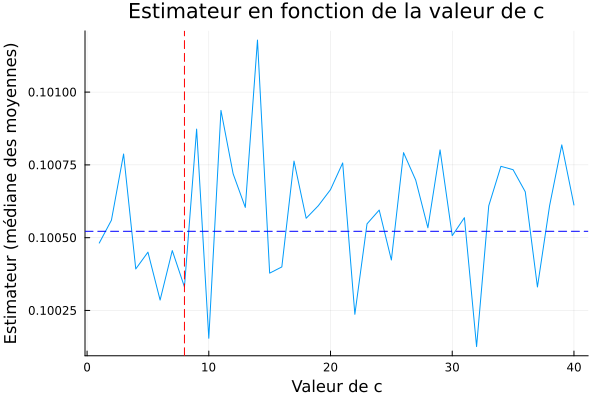

In [49]:
# Tracer le graphique
plot(1:40, median_of_means_opt_C(data1), xlabel="Valeur de c", ylabel="Estimateur (médiane des moyennes)", 
title="Estimateur en fonction de la valeur de c", legend=false)

# Ajout de la droite verticale à x = 8
vline!([8], color=:red, linestyle=:dash, label="x = 8")

# Ajout de la droite horizontale à y = mean(data1)
hline!([mean(data1)], color=:blue, linestyle=:dash, label="y = mean(data1)")

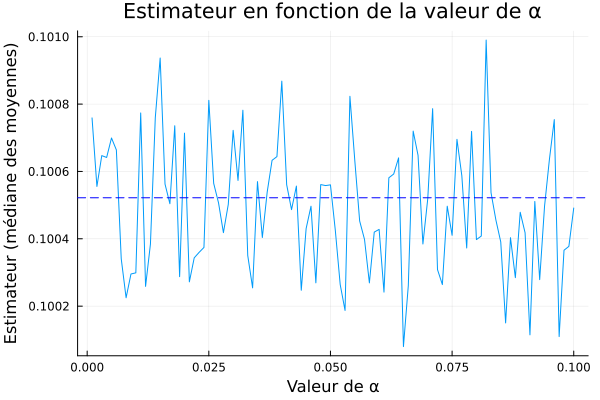

In [50]:
using RobustMeans
plot(median_of_meanAlpha(data1), xlabel="Valeur de α", ylabel="Estimateur (médiane des moyennes)", 
        title="Estimateur en fonction de la valeur de α", legend=false)

# Ajout de la droite horizontale à y = mean(data1)
hline!([mean(data1)], color=:blue, linestyle=:dash, label="y = mean(data1)")

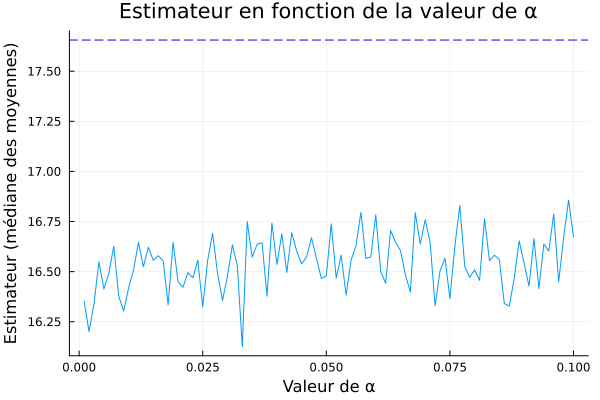

In [51]:
plot(median_of_meanAlpha(data2), xlabel="Valeur de α", ylabel="Estimateur (médiane des moyennes)", 
        title="Estimateur en fonction de la valeur de α", legend=false)

# Ajout de la droite horizontale à y = mean(data1)
hline!([mean(data2)], color=:blue, linestyle=:dash, label="y = mean(data2)")